In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
plt.style.use('seaborn-whitegrid')
plt.style.use('tableau-colorblind10')
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (6.75, 5),
          'lines.linewidth': 3.0,
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large',
          'legend.fontsize': 'xx-large',
         'font.size': 11,
          'font.family': 'serif',
          "mathtext.fontset": "dejavuserif",
         'axes.titlepad': 12,
        'axes.labelpad': 12}
plt.rcParams.update(params)

In [3]:
defcolors = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors = {'cubic': defcolors[0], 'pw. quad.': defcolors[5], 'GLS': defcolors[6]}
linestyles = {'cubic': '-', 'pw. quad.': '--', 'GLS': '-.'}

In [4]:
with open('timed_convergence_gpu_snowy.json', 'r') as f:
    data =  { k: v for k, v in json.load(f).items()}

In [5]:
data

{'dt_values': [0.001,
  0.00125,
  0.0015625,
  0.001953125,
  0.00244140625,
  0.0030517578125,
  0.003814697265625,
  0.00476837158203125,
  0.0059604644775390625,
  0.007450580596923828,
  0.009313225746154785,
  0.011641532182693481,
  0.014551915228366852,
  0.018189894035458565,
  0.022737367544323206,
  0.028421709430404007,
  0.03552713678800501,
  0.04440892098500626,
  0.05551115123125783,
  0.06938893903907228,
  0.08673617379884035,
  0.10842021724855044,
  0.13552527156068805,
  0.1694065894508601,
  0.21175823681357508],
 'relax_1d': {'EF': {'cubic': [[[[0.0008931496858614195],
      [0.0011427879756537409],
      [0.0014558194289209325],
      [0.001848667143433018],
      [0.0023422058913697354],
      [0.0029630911958980063],
      [0.0037456252763902196],
      [0.004734238160038835],
      [0.005987313073048237],
      [0.0075827514281474355],
      [0.009626754300705505],
      [0.012269219254891429],
      [0.015731819296923973],
      [0.020360939912771964],
     

In [6]:
experiments = ['relax_1d', 'adhesion_1d', 'small_monolayer', 'large_monolayer']
solvers = ['EF', 'EB']
force_names = ['cubic', 'pw. quad.', 'GLS']

In [7]:
dt_values = data.pop('dt_values')

In [8]:
data

{'relax_1d': {'EF': {'cubic': [[[[0.0008931496858614195],
      [0.0011427879756537409],
      [0.0014558194289209325],
      [0.001848667143433018],
      [0.0023422058913697354],
      [0.0029630911958980063],
      [0.0037456252763902196],
      [0.004734238160038835],
      [0.005987313073048237],
      [0.0075827514281474355],
      [0.009626754300705505],
      [0.012269219254891429],
      [0.015731819296923973],
      [0.020360939912771964],
      [0.026739088178292444],
      [0.03591138487690521],
      [0.04984455184075551],
      [0.07238915043931803],
      [0.11160762245359065],
      [0.18768850411462],
      [0.3748201884172264],
      [0.7268643725398322],
      [1.0748843021108245],
      [1.501636249396991],
      [2.0199890147724617]],
     [0.1267549991607666,
      0.10438394546508789,
      0.08236885070800781,
      0.06522274017333984,
      0.051954030990600586,
      0.041562795639038086,
      0.03333163261413574,
      0.026622295379638672,
      0.02125668

In [9]:
results = {}
for exp in experiments: 
    results[exp] = {}
    for solver in solvers:
        results[exp][solver] = {}
        for force in force_names:   
            results[exp][solver][force] = {}
            errors = []
            times = []
            for error, time in data[exp][solver][force]:
                errors.append(error)
                times.append(time)

            results[exp][solver][force]['errors'] = np.array(errors)
            results[exp][solver][force]['times'] = np.array(times)
             
            


In [10]:
results[exp][solver][force]['errors'].shape

(10, 25, 2)

In [11]:
with open('timed_convergence_gpu_snowy_larger_dt.json', 'r') as f:
    data_larger_dt =  { k: v for k, v in json.load(f).items()}

In [12]:
larger_dt_values = data_larger_dt.pop('dt_values')

In [13]:
results_larger_dt = {}
for exp in experiments: 
    results_larger_dt[exp] = {}
    for solver in solvers:
        results_larger_dt[exp][solver] = {}
        for force in force_names:   
            results_larger_dt[exp][solver][force] = {}
            errors = []
            times = []
            for error, time in data_larger_dt[exp][solver][force]:
                errors.append(error)
                times.append(time)

            results_larger_dt[exp][solver][force]['errors'] = np.array(errors)
            results_larger_dt[exp][solver][force]['times'] = np.array(times)
             
            


In [14]:
all_dt_values = np.concatenate((dt_values, larger_dt_values))

In [15]:
len(all_dt_values)

31

In [16]:
exp = 'relax_1d'
force = 'cubic'
a = np.concatenate((np.mean(np.sum(results[exp]['EF'][force]['errors'], axis=2), axis=0), 
                np.mean(np.sum(results_larger_dt[exp]['EF'][force]['errors'], axis=2), axis=0)))

In [17]:
len(a)

31

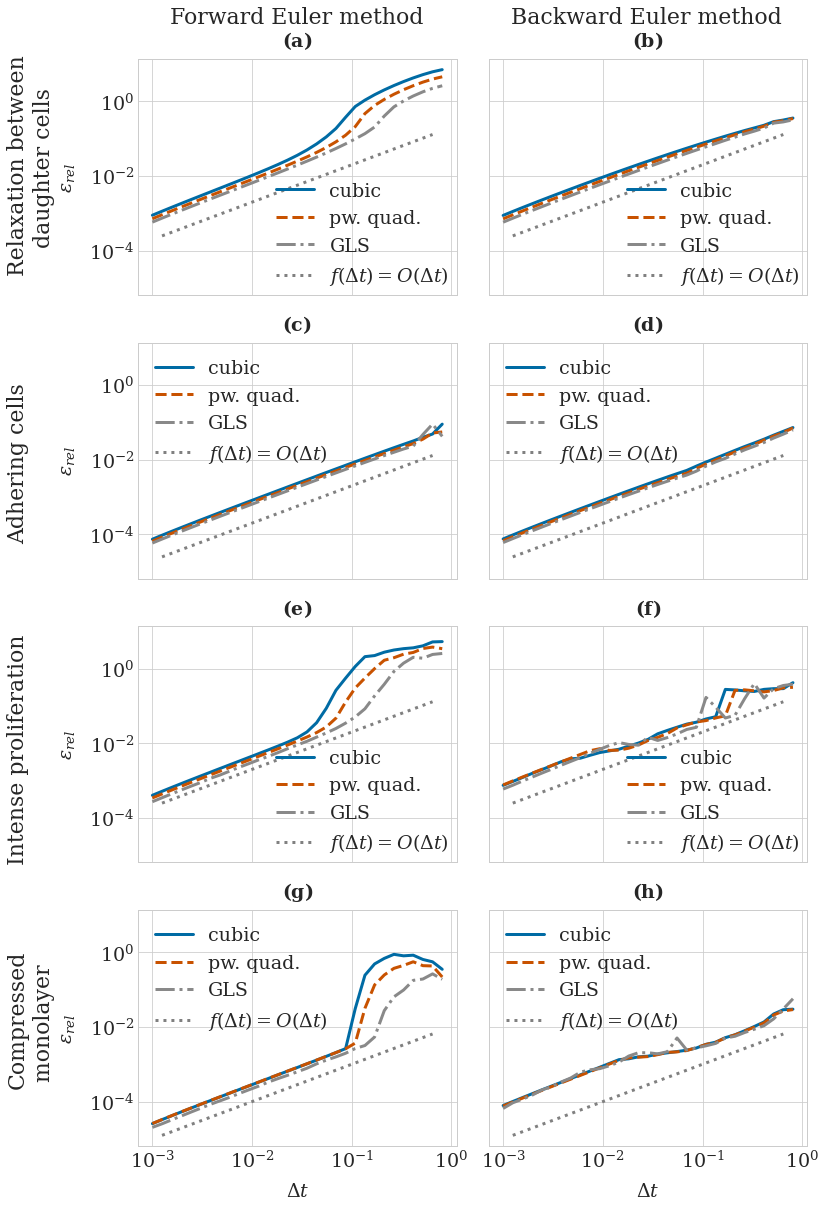

In [18]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4,2, figsize=(12, 20), sharey=True, gridspec_kw={'wspace': 0.1})

exp = 'relax_1d'
# ax1
for force in force_names: 
    rel_err = np.concatenate((np.mean(np.sum(results[exp]['EF'][force]['errors'], axis=2), axis=0), 
                np.mean(np.sum(results_larger_dt[exp]['EF'][force]['errors'], axis=2), axis=0)))
    ax1.loglog(np.concatenate((dt_values, larger_dt_values)), rel_err, label=force, color=colors[force], linestyle=linestyles[force])
    #plt.loglog(dt_values, np.array(sol_dicts['EF'][force])[:,1], label=force+' y')
ax1.loglog(all_dt_values[1:-1], np.array(all_dt_values[1:-1])*0.2, ':', label='$f(\Delta t)= O(\Delta t)$', color='grey')
ax1.legend(loc='lower right', borderaxespad=0.)
#plt.legend()
#ax1.set(xlabel='$\Delta t$')
ax1.set_title(r'$\bf{(a)}$')
ax1.set(ylabel='$\epsilon_{rel}$')
#ax1.set_xlim([7*1e-4, 5*1e-1])
#ax1.set_ylim([5*1e-6, 5*1e-0])
ax1.set_xticklabels([])
#ax1.set_ylim([1e-6, 5*1e-0])
ax1.text(0.0015, 120, 'Forward Euler method', fontsize=22)
ax1.text(0.000035, 0.00003, 'Relaxation between\n    daughter cells', fontsize=22, rotation='vertical')


#ax2
for force in force_names:
    rel_err = np.concatenate((np.mean(np.sum(results[exp]['EB'][force]['errors'], axis=2), axis=0), 
                np.mean(np.sum(results_larger_dt[exp]['EB'][force]['errors'], axis=2), axis=0)))
    ax2.loglog(all_dt_values, rel_err, label=force, color=colors[force], linestyle=linestyles[force])
    #plt.loglog(dt_values, np.array(sol_dicts[current_solver][force])[:,1], label=force+' y')
ax2.loglog(all_dt_values[1:-1], np.array(all_dt_values[1:-1])*0.2, ':', label='$f(\Delta t)= O(\Delta t)$', color='grey')
ax2.legend(loc='lower right',borderaxespad=0.)
#ax2.set(xlabel='$\Delta t$')
#ax2.set_xlim([7*1e-4, 5*1e-1])
ax2.set_title(r'$\bf{(b)}$')
ax2.set_xticklabels([])
ax2.text(0.0012, 120, 'Backward Euler method', fontsize=22)

exp = 'adhesion_1d'
# ax3
for force in force_names: 
    rel_err = np.concatenate((np.mean(np.sum(results[exp]['EF'][force]['errors'], axis=2), axis=0), 
                np.mean(np.sum(results_larger_dt[exp]['EF'][force]['errors'], axis=2), axis=0)))
    ax3.loglog(all_dt_values, rel_err, label=force, color=colors[force], linestyle=linestyles[force])
    #plt.loglog(dt_values, np.array(sol_dicts['EF'][force])[:,1], label=force+' y')
ax3.loglog(all_dt_values[1:-1], np.array(all_dt_values[1:-1])*0.02, ':', label='$f(\Delta t)= O(\Delta t)$', color='grey')
ax3.legend(loc='upper left')
#plt.legend()
#ax1.set(xlabel='$\Delta t$')
ax3.set_title(r'$\bf{(c)}$')
ax3.set(ylabel='$\epsilon_{rel}$')
#ax3.set_xlim([7*1e-4, 5*1e-1])
#ax3.set_ylim([1.2*1e-5, 8*1e-0])
ax3.set_xticklabels([])
#ax1.set_ylim([5*1e-8, 5*1e-0])
ax3.text(0.000035, 0.00008, 'Adhering cells', fontsize=22, rotation='vertical')


#ax4
for force in force_names: 
    rel_err = np.concatenate((np.mean(np.sum(results[exp]['EB'][force]['errors'], axis=2), axis=0), 
                np.mean(np.sum(results_larger_dt[exp]['EB'][force]['errors'], axis=2), axis=0)))
    ax4.loglog(all_dt_values, rel_err, label=force, color=colors[force], linestyle=linestyles[force])
    #plt.loglog(dt_values, np.array(sol_dicts[current_solver][force])[:,1], label=force+' y')
ax4.loglog(all_dt_values[1:-1], np.array(all_dt_values[1:-1])*0.02, ':', label='$f(\Delta t)= O(\Delta t)$', color='grey')
ax4.legend(loc='upper left')
#ax2.set(xlabel='$\Delta t$')
#ax4.set_xlim([7*1e-4, 5*1e-1])
ax4.set_title(r'$\bf{(d)}$')
ax4.set_xticklabels([])


exp = 'small_monolayer'
# ax5
for force in force_names: 
    rel_err = np.concatenate((np.mean(np.sum(results[exp]['EF'][force]['errors'], axis=2), axis=0), 
                np.mean(np.sum(results_larger_dt[exp]['EF'][force]['errors'], axis=2), axis=0)))
    ax5.loglog(all_dt_values, rel_err, label=force, color=colors[force], linestyle=linestyles[force])
    #plt.loglog(dt_values, np.array(sol_dicts['EF'][force])[:,1], label=force+' y')
ax5.loglog(all_dt_values[1:-1], np.array(all_dt_values[1:-1])*0.2, ':', label='$f(\Delta t)= O(\Delta t)$', color='grey')
ax5.legend(loc='lower right', borderaxespad=0.)
#plt.legend()
#ax5.set(xlabel='$\Delta t$')
ax5.set_title(r'$\bf{(e)}$')
ax5.set(ylabel='$\epsilon_{rel}$')
#ax5.set_xlim([7*1e-4, 5*1e-1])
#ax5.set_ylim([5*1e-6, 5*1e-0])
ax5.set_xticklabels([])
#ax1.set_ylim([5*1e-8, 5*1e-0])
ax5.text(0.000035, 0.000008, 'Intense proliferation', fontsize=22, rotation='vertical')


#ax6
for force in force_names:
    rel_err = np.concatenate((np.mean(np.sum(results[exp]['EB'][force]['errors'], axis=2), axis=0), 
                np.mean(np.sum(results_larger_dt[exp]['EB'][force]['errors'], axis=2), axis=0)))
    ax6.loglog(all_dt_values, rel_err, label=force, color=colors[force], linestyle=linestyles[force])
    #plt.loglog(dt_values, np.array(sol_dicts[current_solver][force])[:,1], label=force+' y')
ax6.loglog(all_dt_values[1:-1], np.array(all_dt_values[1:-1])*0.2, ':', label='$f(\Delta t)= O(\Delta t)$', color='grey')
ax6.legend(loc='lower right',borderaxespad=0.)
#ax6.set(xlabel='$\Delta t$')
#ax6.set_xlim([7*1e-4, 5*1e-1])
ax6.set_title(r'$\bf{(f)}$')
ax6.set_xticklabels([])

exp = 'large_monolayer'
# a7
for force in force_names: 
    rel_err = np.concatenate((np.mean(np.sum(results[exp]['EF'][force]['errors'], axis=2), axis=0), 
                np.mean(np.sum(results_larger_dt[exp]['EF'][force]['errors'], axis=2), axis=0)))
    ax7.loglog(all_dt_values, rel_err, label=force, color=colors[force], linestyle=linestyles[force])
    #plt.loglog(dt_values, np.array(sol_dicts['EF'][force])[:,1], label=force+' y')
ax7.loglog(all_dt_values[1:-1], np.array(all_dt_values[1:-1])*0.01, ':', label='$f(\Delta t)= O(\Delta t)$', color='grey')
ax7.legend()
#plt.legend()
ax7.set(xlabel='$\Delta t$')
ax7.set_title(r'$\bf{(g)}$')
ax7.set(ylabel='$\epsilon_{rel}$')
#ax5.set_xlim([7*1e-4, 5*1e-1])
#ax7.set_ylim([5*1e-6, 5*1e-0])
#ax5.set_xticklabels([])
#ax1.set_ylim([5*1e-8, 5*1e-0])
ax7.text(0.000035, 0.0003, 'Compressed\n monolayer', fontsize=22, rotation='vertical')


#ax8
for force in force_names: 
    rel_err = np.concatenate((np.mean(np.sum(results[exp]['EB'][force]['errors'], axis=2), axis=0), 
                np.mean(np.sum(results_larger_dt[exp]['EB'][force]['errors'], axis=2), axis=0)))
    ax8.loglog(all_dt_values, rel_err, label=force, color=colors[force], linestyle=linestyles[force])
    #plt.loglog(dt_values, np.array(sol_dicts[current_solver][force])[:,1], label=force+' y')
ax8.loglog(all_dt_values[1:-1], np.array(all_dt_values[1:-1])*0.01, ':', label='$f(\Delta t)= O(\Delta t)$', color='grey')
ax8.legend()
ax8.set(xlabel='$\Delta t$')
#ax6.set_xlim([7*1e-4, 5*1e-1])
ax8.set_title(r'$\bf{(h)}$')
#ax6.set_xticklabels([])


plt.savefig("convergence_study.pdf", dpi=300, bbox_inches='tight')

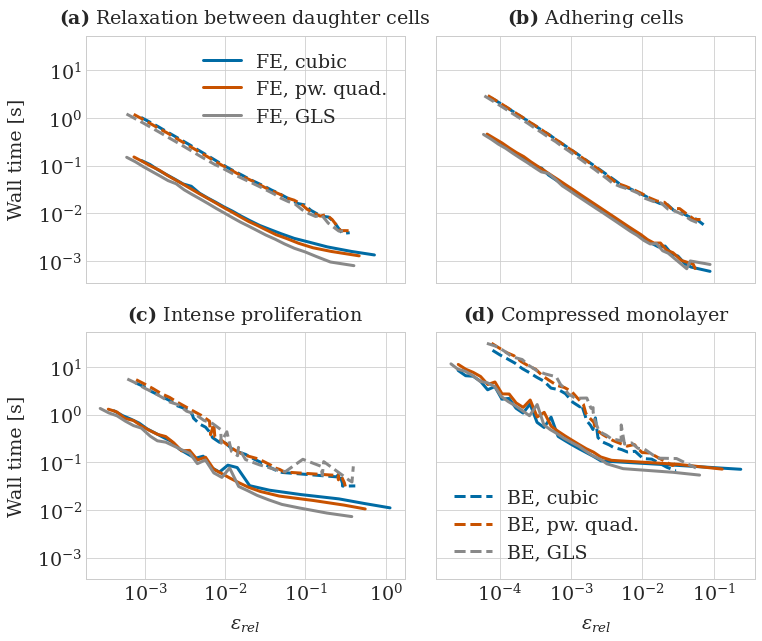

In [19]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(12, 10), sharex='col', sharey=True, gridspec_kw={'wspace': 0.1})

exp='relax_1d'
end_index = {'cubic': -9, 'pw. quad.': -8, 'GLS': -6}
for force in force_names:
    rel_err_EF = np.concatenate((np.mean(np.sum(results[exp]['EF'][force]['errors'], axis=2), axis=0), 
                                 np.mean(np.sum(results_larger_dt[exp]['EF'][force]['errors'], axis=2), axis=0)))
    times_EF = np.concatenate((np.mean(results[exp]['EF'][force]['times'], axis=0), 
                               np.mean(results_larger_dt[exp]['EF'][force]['times'], axis=0)))
    rel_err_EB = np.concatenate((np.mean(np.sum(results[exp]['EB'][force]['errors'], axis=2), axis=0), 
                                 np.mean(np.sum(results_larger_dt[exp]['EB'][force]['errors'], axis=2), axis=0)))
    times_EB = np.concatenate((np.mean(results[exp]['EB'][force]['times'], axis=0), 
                               np.mean(results_larger_dt[exp]['EB'][force]['times'], axis=0)))
    ax1.loglog(rel_err_EF[:end_index[force]], times_EF[:end_index[force]], label='FE, '+force, color=colors[force])
    ax1.loglog(rel_err_EB, times_EB,  linestyle='--', color=colors[force])

    #plt.loglog(np.array(sol_dicts['EB'][force])[:,0], np.array(sol_dicts['EB'][force])[:,1], linestyle='--', color=colors[force])

#ax1.set(xlabel='$\epsilon_{rel}$')    
ax1.set(ylabel='Wall time [s]')
#plt.ylim([5*1e-4, 5*1e-0])
ax1.legend()
ax1.set_xticklabels([])
ax1.set_title(r'$\bf{(a)}$ Relaxation between daughter cells')


exp='adhesion_1d'
for force in force_names:
    rel_err_EF = np.concatenate((np.mean(np.sum(results[exp]['EF'][force]['errors'], axis=2), axis=0), 
                                 np.mean(np.sum(results_larger_dt[exp]['EF'][force]['errors'], axis=2), axis=0)))
    times_EF = np.concatenate((np.mean(results[exp]['EF'][force]['times'], axis=0), 
                               np.mean(results_larger_dt[exp]['EF'][force]['times'], axis=0)))
    rel_err_EB = np.concatenate((np.mean(np.sum(results[exp]['EB'][force]['errors'], axis=2), axis=0), 
                                 np.mean(np.sum(results_larger_dt[exp]['EB'][force]['errors'], axis=2), axis=0)))
    times_EB = np.concatenate((np.mean(results[exp]['EB'][force]['times'], axis=0), 
                               np.mean(results_larger_dt[exp]['EB'][force]['times'], axis=0)))
    sorted_indices = np.argsort(rel_err_EF)
    ax2.loglog(rel_err_EF[sorted_indices], times_EF[sorted_indices], label='FE, '+force, color=colors[force])
    ax2.loglog(rel_err_EB, times_EB,  linestyle='--', color=colors[force])
    #plt.loglog(np.array(sol_dicts['EB'][force])[:,0], np.array(sol_dicts['EB'][force])[:,1], linestyle='--', color=colors[force])

#ax1.xlabel('$\epsilon_{rel}$')    
#ax1.ylabel('Wall time [s]')
#plt.ylim([5*1e-4, 5*1e-0])
#ax2.legend()
ax2.set_xticklabels([])
ax2.set_title(r'$\bf{(b)}$ Adhering cells')


exp = 'small_monolayer'

end_index = {'cubic': -9, 'pw. quad.': -8, 'GLS': -6}
for force in force_names:
    rel_err_EF = np.concatenate((np.mean(np.sum(results[exp]['EF'][force]['errors'], axis=2), axis=0), 
                                 np.mean(np.sum(results_larger_dt[exp]['EF'][force]['errors'], axis=2), axis=0)))
    times_EF = np.concatenate((np.mean(results[exp]['EF'][force]['times'], axis=0), 
                               np.mean(results_larger_dt[exp]['EF'][force]['times'], axis=0)))
    rel_err_EB = np.concatenate((np.mean(np.sum(results[exp]['EB'][force]['errors'], axis=2), axis=0), 
                                 np.mean(np.sum(results_larger_dt[exp]['EB'][force]['errors'], axis=2), axis=0)))
    times_EB = np.concatenate((np.mean(results[exp]['EB'][force]['times'], axis=0), 
                               np.mean(results_larger_dt[exp]['EB'][force]['times'], axis=0)))
    sorted_indices = np.argsort(rel_err_EB)
    ax3.loglog(rel_err_EF[:end_index[force]], times_EF[:end_index[force]], label='FE, '+force, color=colors[force])
    ax3.loglog(rel_err_EB[sorted_indices], times_EB[sorted_indices],  linestyle='--', color=colors[force])
    #plt.loglog(np.array(sol_dicts['EB'][force])[:,0], np.array(sol_dicts['EB'][force])[:,1], linestyle='--', color=colors[force])

ax3.set(xlabel='$\epsilon_{rel}$')    
ax3.set(ylabel='Wall time [s]')
#plt.ylim([5*1e-4, 5*1e-0])
#ax3.legend()
ax3.set_title(r'$\bf{(c)}$ Intense proliferation')


exp='large_monolayer'
end_index = {'cubic': -8, 'pw. quad.': -7, 'GLS': -5}
for force in force_names:
    rel_err_EF = np.concatenate((np.mean(np.sum(results[exp]['EF'][force]['errors'], axis=2), axis=0), 
                                 np.mean(np.sum(results_larger_dt[exp]['EF'][force]['errors'], axis=2), axis=0)))
    times_EF = np.concatenate((np.mean(results[exp]['EF'][force]['times'], axis=0), 
                               np.mean(results_larger_dt[exp]['EF'][force]['times'], axis=0)))
    rel_err_EB = np.concatenate((np.mean(np.sum(results[exp]['EB'][force]['errors'], axis=2), axis=0), 
                                 np.mean(np.sum(results_larger_dt[exp]['EB'][force]['errors'], axis=2), axis=0)))
    times_EB = np.concatenate((np.mean(results[exp]['EB'][force]['times'], axis=0), 
                               np.mean(results_larger_dt[exp]['EB'][force]['times'], axis=0)))
    sorted_indices = np.argsort(rel_err_EB)
    ax4.loglog(rel_err_EF[:end_index[force]], times_EF[:end_index[force]],  color=colors[force])
    ax4.loglog(rel_err_EB[sorted_indices], times_EB[sorted_indices], label='BE, '+force, linestyle='--', color=colors[force])
   #plt.loglog(np.array(sol_dicts['EB'][force])[:,0], np.array(sol_dicts['EB'][force])[:,1], linestyle='--', color=colors[force])
ax4.set(xlabel='$\epsilon_{rel}$')  
ax4.set_title(r'$\bf{(d)}$ Compressed monolayer')
ax4.legend()

#fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=6)

plt.savefig("exec_times_convergence_study.pdf", dpi=300, bbox_inches='tight')


In [20]:
# Check exact dt_values for a certain relative error

In [21]:
force = 'pw. quad.'
exp = 'large_monolayer'

In [22]:
#exp = 'large_monolayer'
exp= 'small_monolayer'
for force in force_names:
    rel_err_EF = np.concatenate((np.mean(np.sum(results[exp]['EF'][force]['errors'], axis=2), axis=0), 
                                 np.mean(np.sum(results_larger_dt[exp]['EF'][force]['errors'], axis=2), axis=0)))
    rel_err_EB = np.concatenate((np.mean(np.sum(results[exp]['EB'][force]['errors'], axis=2), axis=0), 
                                 np.mean(np.sum(results_larger_dt[exp]['EB'][force]['errors'], axis=2), axis=0)))
    index_EF = (np.abs(rel_err_EF - 0.03)).argmin()
    index_EB = (np.abs(rel_err_EB - 0.03)).argmin()
    print(force+' EF '+str(rel_err_EF[index_EF])+' '+str(all_dt_values[index_EF]))
    print(force+' EB '+str(rel_err_EB[index_EB])+' '+str(all_dt_values[index_EB]))

cubic EF 0.03554224766422786 0.04440892098500626
cubic EB 0.03253561502009166 0.06938893903907228
pw. quad. EF 0.02727208325763214 0.05551115123125783
pw. quad. EB 0.03119954289718018 0.06938893903907228
GLS EF 0.03463408767256089 0.08673617379884035
GLS EB 0.02674772631538514 0.08673617379884035


In [23]:
rel_err_EF = np.concatenate((np.mean(np.sum(results[exp]['EF'][force]['errors'], axis=2), axis=0), 
                                 np.mean(np.sum(results_larger_dt[exp]['EF'][force]['errors'], axis=2), axis=0)))

In [24]:
rel_err_EF

array([2.72649139e-04, 3.48158992e-04, 4.42967963e-04, 5.62261020e-04,
       7.11378826e-04, 8.91578348e-04, 1.14968869e-03, 1.41324577e-03,
       1.79516014e-03, 2.28430723e-03, 2.85892442e-03, 3.59761146e-03,
       4.46676332e-03, 5.62547293e-03, 7.15880613e-03, 9.02564469e-03,
       1.12902797e-02, 1.46252096e-02, 1.88927830e-02, 2.48939518e-02,
       3.46340877e-02, 5.07237546e-02, 8.36989320e-02, 1.85115821e-01,
       3.79096461e-01, 8.36247885e-01, 1.39579870e+00, 2.00214262e+00,
       1.89025813e+00, 2.38401371e+00, 2.53359628e+00])

In [25]:
np.where(rel_err_EF > rel_err_EB)

(array([17, 18, 19, 20, 23, 24, 25, 26, 27, 28, 29, 30]),)

In [26]:
all_dt_values[22]

0.13552527156068805

In [27]:
rel_err_EB = np.concatenate((np.mean(np.sum(results[exp]['EB'][force]['errors'], axis=2), axis=0), 
                                 np.mean(np.sum(results_larger_dt[exp]['EB'][force]['errors'], axis=2), axis=0)))

In [28]:
rel_err_EB

array([0.00059484, 0.00075279, 0.00097274, 0.00124039, 0.0015853 ,
       0.00201347, 0.00257743, 0.00327104, 0.00413747, 0.00539541,
       0.00688318, 0.00873549, 0.01042479, 0.00931087, 0.00886825,
       0.01453819, 0.01189908, 0.01419952, 0.01781492, 0.02340352,
       0.02674773, 0.16890862, 0.09270333, 0.04745363, 0.05624292,
       0.15676235, 0.39593808, 0.16214482, 0.28980932, 0.35183915,
       0.38116084])

In [29]:
all_dt_values[-1]

0.8077935669463161

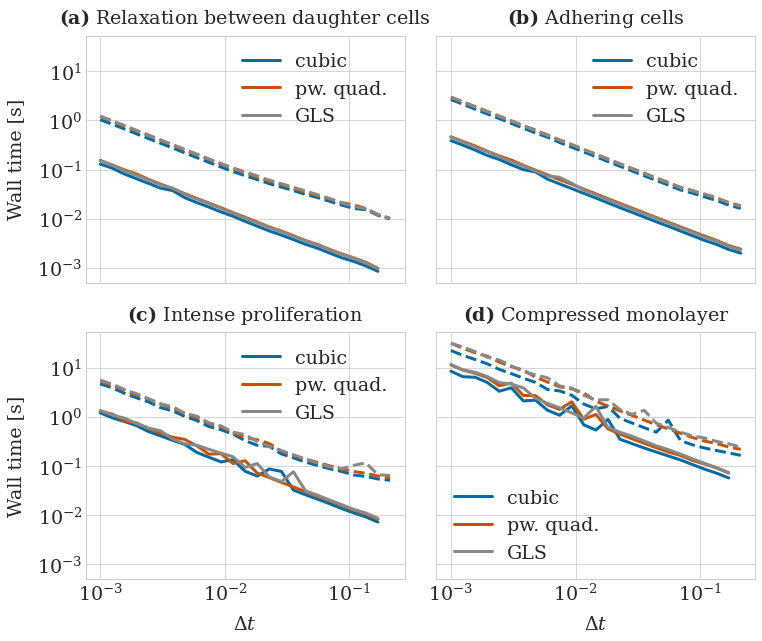

In [30]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(12, 10), sharex='col', sharey=True, gridspec_kw={'wspace': 0.1})

exp='relax_1d'
end_index = {'cubic': -1, 'pw. quad.': -1, 'GLS': -1}
for force in force_names:
    ax1.loglog(dt_values[:end_index[force]], np.mean(results[exp]['EF'][force]['times'], axis=0)[:end_index[force]], label=force, color=colors[force])
    ax1.loglog(dt_values, np.mean(results[exp]['EB'][force]['times'], axis=0),  linestyle='--', color=colors[force])

    #plt.loglog(np.array(sol_dicts['EB'][force])[:,0], np.array(sol_dicts['EB'][force])[:,1], linestyle='--', color=colors[force])

#ax1.set(xlabel='$\epsilon_{rel}$')    
ax1.set(ylabel='Wall time [s]')
#plt.ylim([5*1e-4, 5*1e-0])
ax1.legend()
ax1.set_xticklabels([])
ax1.set_title(r'$\bf{(a)}$ Relaxation between daughter cells')


exp='adhesion_1d'
for force in force_names:
    ax2.loglog(dt_values, np.mean(results[exp]['EF'][force]['times'], axis=0), label=force, color=colors[force])
    ax2.loglog(dt_values, np.mean(results[exp]['EB'][force]['times'], axis=0),  linestyle='--', color=colors[force])

    #plt.loglog(np.array(sol_dicts['EB'][force])[:,0], np.array(sol_dicts['EB'][force])[:,1], linestyle='--', color=colors[force])

#ax1.xlabel('$\epsilon_{rel}$')    
#ax1.ylabel('Wall time [s]')
#plt.ylim([5*1e-4, 5*1e-0])
ax2.legend()
ax2.set_xticklabels([])
ax2.set_title(r'$\bf{(b)}$ Adhering cells')


exp = 'small_monolayer'
end_index = {'cubic': -1, 'pw. quad.': -1, 'GLS': -1}
for force in force_names:
    ax3.loglog(dt_values[:end_index[force]], np.mean(results[exp]['EF'][force]['times'], axis=0)[:end_index[force]], label=force, color=colors[force])
    ax3.loglog(dt_values, np.mean(results[exp]['EB'][force]['times'], axis=0),  linestyle='--', color=colors[force])

    #plt.loglog(np.array(sol_dicts['EB'][force])[:,0], np.array(sol_dicts['EB'][force])[:,1], linestyle='--', color=colors[force])

ax3.set(xlabel='$\Delta t$')    
ax3.set(ylabel='Wall time [s]')
#plt.ylim([5*1e-4, 5*1e-0])
ax3.legend()
ax3.set_title(r'$\bf{(c)}$ Intense proliferation')


exp='large_monolayer'
end_index = {'cubic': -1, 'pw. quad.': -1, 'GLS': -1}
for force in force_names:
    ax4.loglog(dt_values[:end_index[force]], np.mean(results[exp]['EF'][force]['times'], axis=0)[:end_index[force]], label=force, color=colors[force])
    ax4.loglog(dt_values, np.mean(results[exp]['EB'][force]['times'], axis=0),  linestyle='--', color=colors[force])

    #plt.loglog(np.array(sol_dicts['EB'][force])[:,0], np.array(sol_dicts['EB'][force])[:,1], linestyle='--', color=colors[force])
ax4.set(xlabel='$\Delta t$')  
ax4.set_title(r'$\bf{(d)}$ Compressed monolayer')
ax4.legend()

#plt.savefig("exec_times_convergence_study.pdf", dpi=300, bbox_inches='tight')
